## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [ ]:
print(f'Пропущенные значения:\n{X.isnull().sum()}\n')

Пропущенные значения:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64



Пропущенных значений нет, так что ничего не удаляем :)

In [ ]:
print(f'Пропущенные значения в таргете:\n{np.isnan(y).any()}')

Пропущенные значения в таргете:
False


На всякий случай проверила, нет ли пропусков в переменной-таргете. Все ок, так что тоже ничего не удаляем

In [ ]:
cat_features_mask = (X.dtypes == "object").values

cat_features_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

Категориальных переменных нет, так что OneHot-кодирование не пригодится :)

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [ ]:
np.random.seed(29) # Задаем рандом

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

## Выводы
Параметр stratify важно использовать, чтобы при разбиении соотношение классов в этих выборках соответствовало соотношению классов в исходном наборе данных. Без этого при разбиении может оказаться так, что в обучающей выборке не будет какого-то класса, и на тесте будут плохие результаты, ведь модель ничего не знала при обучении о нем.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
alcohol_magnesium_features = ['alcohol', 'magnesium'] # Выделим признаки, с которыми работаем

In [ ]:
# Масштабируем признаки
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[alcohol_magnesium_features]) # Обучаем и применяем к обучающей выборке
X_test_scaled = scaler.transform(X_test[alcohol_magnesium_features]) # Только применяем к тестовой выборке

In [ ]:
# Обучаем классификаторы
neighbors = [1, 3, 5, 10, 15, 25] # Количества соседей

classifiers = []

for n in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=n)
  classifier.fit(X_train_scaled, y_train)
  classifiers.append(classifier)

In [ ]:
# Применим классификаторы
print('NN\tTrain\tTest')
for classifier in classifiers:
  train_accuracy = accuracy_score(y_train, classifier.predict(X_train_scaled))
  test_accuracy = accuracy_score(y_test, classifier.predict(X_test_scaled))
  print(f'{classifier.n_neighbors}\t{train_accuracy:0.2f}\t{test_accuracy:0.2f}')

NN	Train	Test
1	0.99	0.67
3	0.85	0.69
5	0.76	0.72
10	0.75	0.81
15	0.73	0.72
25	0.74	0.70


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

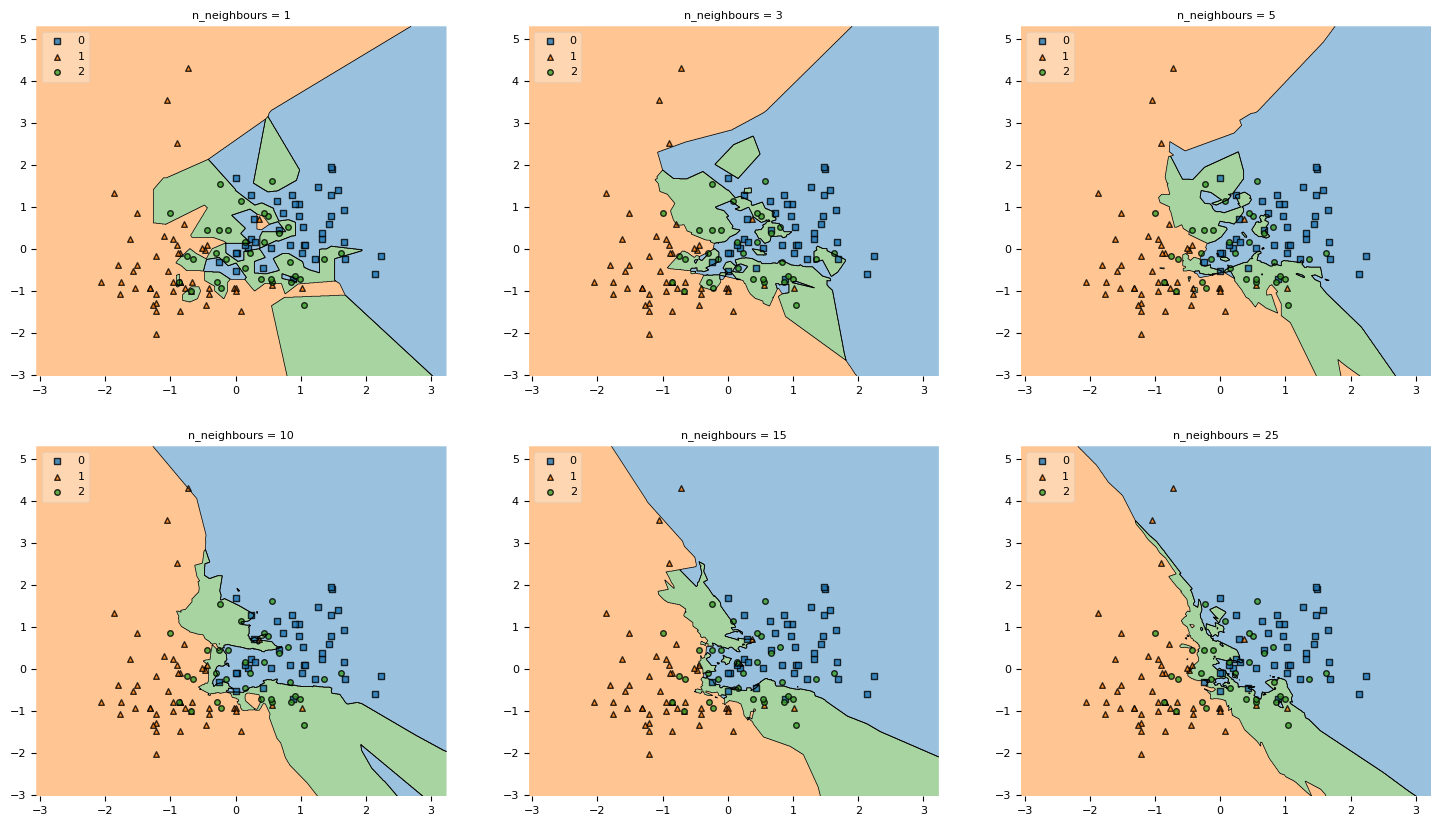

In [ ]:
FONT_SIZE = 8 # Для красоты
MARKER_SIZE = 16

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(18, 10))

plt.rc('font', size=FONT_SIZE)
plt.rc('axes', titlesize=FONT_SIZE)

for clf, grd in zip(classifiers, itertools.product([0, 1, 2], repeat=2)):
  ax = plt.subplot(gs[grd[0], grd[1]])
  fig = plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2,
                              scatter_kwargs={'s': MARKER_SIZE})

  plt.title(f'n_neighbours = {clf.n_neighbors}')
  plt.xticks(fontsize=FONT_SIZE)
  plt.yticks(fontsize=FONT_SIZE)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

## Выводы
1. На основе 1.3 можно заметить, что максимальный процент правильных ответов на тестовой выборке проявляется при 10 соседей.
2. На основе 1.5 также можно выделить вариант 10 или 15 соседей как оптимальный. Для меньшего числа соседей, особенно, 1 и 3, можно заметить явное переобучение: границы областей очень резкие и зизагообразные, видно, что они сильно подстариваются по объекты тестовой выборки (есть прям целые "островки" для одного объекта). Для более больших n границы наоборот слишкком планые, области захватывают слишком большое число соседей из-за чего дают более плохие результаты.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

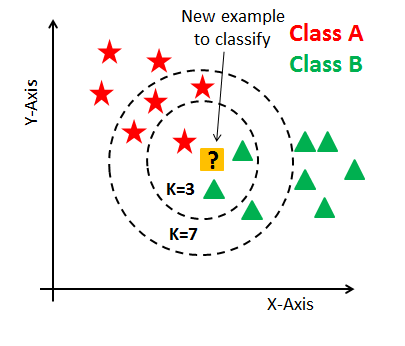

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
      # Запоминаем гиперпараметр - число соседей
      self.k = k

    def fit(self, X, y):
      # Обучаем: просто запоминаем обучающую выборку
      self.X_train = X
      self.y_train = y

    def predict(self, X):
      return np.array([self._predict_for_one(x) for x in X])

    def _predict_for_one(self, x):
      # Считаем расстояние от объекта тестовой выборки до каждого из обучающей
      distances = self.count_distance(x, self.X_train)

      # Получаем индексы k ближайших объектов
      k_nearest_neighbours_ind = np.argsort(distances)[:self.k]

      # Получаем классы k ближайших объектов
      classes_of_k_nearest_neighbors = self.y_train[k_nearest_neighbours_ind]

      # Получаем самый часто встречающийся класс среди соседей
      return Counter(classes_of_k_nearest_neighbors).most_common(1)[0][0]

    def count_distance(self, x, y):
      # Вычисляем Евклидово расстояние от x до каждого объекта в y
      return np.linalg.norm(y - x, axis=1)

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
print(f'Пропущенные значения:\n{data.isnull().sum()}\n')

Пропущенные значения:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64



Пропущенных значений нет, так что ничего не удаляем :)

In [ ]:
data = data.drop(['Unnamed: 0'], axis=1)

data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Удалила кастомные индексы из датасета)

**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
numeric_features_mask = (data.dtypes != "object")
numeric_data_corr = data.loc[:, numeric_features_mask].corr()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

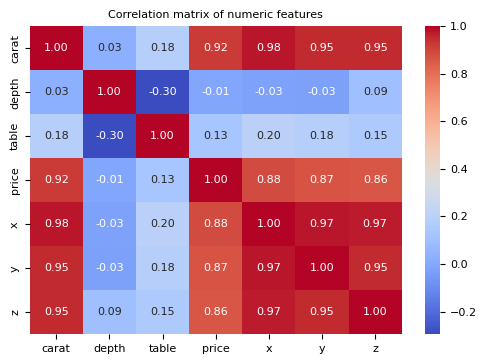

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_data_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation matrix of numeric features")
plt.show()

In [ ]:
print(numeric_data_corr['price'])

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64


## Выводы
Больше всего коррелирует 'carat', а также 'x', 'y', 'z'.

In [ ]:
y = data['price']
X = data.drop('price', axis=1)

Пора бы разделить признаки и целеую переменную.

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
X = pd.get_dummies(X, drop_first=True)
X.head(5)

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [ ]:
y_categorized = pd.qcut(y, q=4, labels=False) # Сделаем категоризацию непрерывной целевой переменной

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y_categorized)

## Выводы
Так как stratify по непрерывной переменной не работает, то я категоризиировала 'price' по квартилям. Подозреваю, что это достаточно слепое деление, и по-хорошему нужно было сначала посмотреть на распределение 'price', чтобы разделить более грамотно. Но это оставим для внимательного и любознательного читателя)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
# Масштабируем признаки
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) # Обучаем и применяем к обучающей выборке
X_test_scaled = scaler.transform(X_test) # Только применяем к тестовой выборке

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

pred_train_linear = lr.predict(X_train_scaled)
pred_test_linear = lr.predict(X_test_scaled)

print(f'Train: {mean_squared_error(y_train, pred_train_linear)}')
print(f'Test: {mean_squared_error(y_test, pred_test_linear)}')

Train: 1254995.1970144885
Test: 1328014.4002362464


In [ ]:
r2_score(y_train, pred_train_linear), r2_score(y_test, pred_test_linear) # Для себя, так удобнее ориентироваться

(0.9205867831453947, 0.9179038460638074)

**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
for feature_name, coef in zip(X_train.columns, lr.coef_):
    print(f"{feature_name}: {coef}")

carat: 5329.854557626435
depth: -93.69154596927797
table: -65.39476563591685
x: -1141.2725893480047
y: -7.371550873245066
z: -21.034623691785995
cut_Good: 175.12928794464398
cut_Ideal: 418.39850992975045
cut_Premium: 340.5727133319436
cut_Very Good: 313.09675586265723
color_E: -77.35102676760975
color_F: -99.86932549656112
color_G: -193.46707255910786
color_H: -353.6843350225374
color_I: -434.96540608253
color_J: -521.9755012653505
clarity_IF: 942.9031555463044
clarity_SI1: 1521.214585323908
clarity_SI2: 972.6920864920634
clarity_VS1: 1598.6179674457194
clarity_VS2: 1747.3181380137587
clarity_VVS1: 1216.687294160456
clarity_VVS2: 1413.2125961168879


## Выводы
Категорически большой вес у 'carat', что указывает на сильное влияние веса бриллианта на его цену. Но длина 'x': имеет большой отрицательный коэффициент, что немного неинтуитивно. Вероятно, проблема в мультиколлинеарности между размерами и весом бриллиантов.

'clarity' также оказывает значительное влияние.

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(X_train_scaled, y_train)

for feature_name, coef in zip(X_train.columns, lasso.coef_):
    print(f"{feature_name}: {coef}")

carat: 4835.620848567743
depth: -100.37722108746323
table: -73.9294523194445
x: -700.5874012412597
y: -0.0
z: -17.986788990697573
cut_Good: 49.93681917987813
cut_Ideal: 213.31800431297486
cut_Premium: 154.05335542814748
cut_Very Good: 142.8115238504316
color_E: -6.5737500828201645
color_F: -33.460689301073025
color_G: -115.89237325854502
color_H: -280.8928850788326
color_I: -362.7748582738501
color_J: -461.8941204425615
clarity_IF: 631.7752190994769
clarity_SI1: 803.0311165941299
clarity_SI2: 348.63314131923875
clarity_VS1: 990.988277054261
clarity_VS2: 1042.1690054942396
clarity_VVS1: 793.0213177608847
clarity_VVS2: 918.8256173214552


In [ ]:
ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled, y_train)

for feature_name, coef in zip(X_train.columns, ridge.coef_):
    print(f"{feature_name}: {coef}")

carat: 5291.0973280379185
depth: -91.83512383945477
table: -65.45388054844251
x: -1098.729477678629
y: -9.44975598060176
z: -24.776320039610372
cut_Good: 175.49739710797738
cut_Ideal: 419.3362955289688
cut_Premium: 341.37818917126646
cut_Very Good: 314.2113264135998
color_E: -76.91526433243078
color_F: -99.67394573527872
color_G: -192.94282183505067
color_H: -352.82776616879863
color_I: -433.63852857501814
color_J: -520.6443413464403
clarity_IF: 931.1635056082698
clarity_SI1: 1492.6258530000355
clarity_SI2: 948.3320752741884
clarity_VS1: 1574.7596939182638
clarity_VS2: 1719.454459958125
clarity_VVS1: 1200.4596833468554
clarity_VVS2: 1394.0199596823104


## Выводы
1. Lasso-регрессия обнулила вес некоторых признаков (например, 'y' = -0.0), что является индикатором отбора признаков, присущего Lasso.
2. И L1, и L2 регрессии незначительно уменьшили некоторые веса.
3. По величине изменения коэффициентов скорее нельзя судить о том, что проблема мультиколлинеарности действительно была значимой в изначальной модели линейной регрессии. И L1, и L2 регрессии, вероятно, улучшили модель и повысили надежность результатов.

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [ ]:
alphas = [0.1, 1, 10, 100, 200]

In [ ]:
norms_lasso = []
norms_ridge = []

for alpha in alphas:
    # Обучаем Lasso
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    norms_lasso.append(np.linalg.norm(lasso.coef_))

    # Обучаем Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    norms_ridge.append(np.linalg.norm(ridge.coef_))

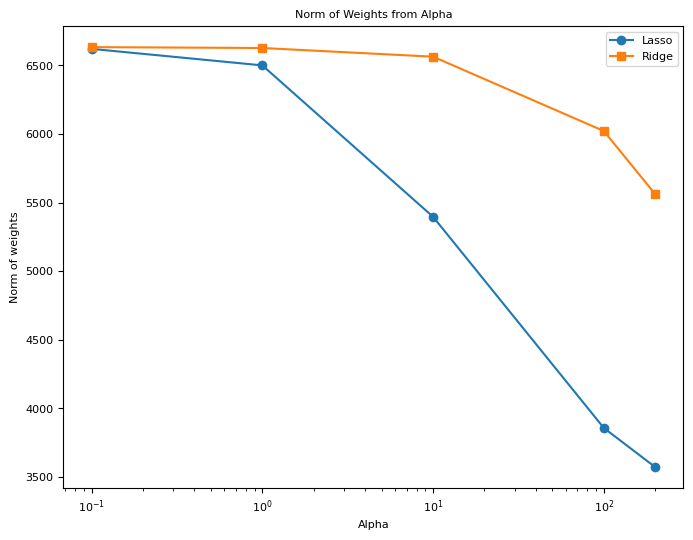

In [ ]:
# Строим графики
plt.figure(figsize=(8, 6))
plt.plot(alphas, norms_lasso, label='Lasso', marker='o')
plt.plot(alphas, norms_ridge, label='Ridge', marker='s')
plt.xscale('log')  # Для наглядности
plt.xlabel('Alpha')
plt.ylabel('Norm of weights')
plt.title('Norm of Weights from Alpha')
plt.legend()
plt.show()

## Выводы
Очевидно, Lasso агрессивнее уменьшает веса.

Lasso-регрессию часто используют для отбора признаков, так как L1-регуляризация способна обнулять коэффициенты менее важных признаков. Для минимизации общей функции стоимости модель "согласится" жертвовать некоторыми признаками (обнуляя их коэффициенты), чтобы уменьшить штраф за регуляризацию.

Более подробно: https://stats.stackexchange.com/questions/74542/why-does-the-lasso-provide-variable-selection

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=29)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5, random_state=29)

In [ ]:
mse_means = lasso_cv.mse_path_.mean(axis=1)

print("Alphas:", lasso_cv.alphas_)
print("Средние MSE для каждого alpha:", mse_means)

optimal_alpha = lasso_cv.alphas_[np.argmin(mse_means)]
print("Оптимальное значение alpha:", optimal_alpha)

Alphas: [2.e+02 1.e+02 1.e+01 1.e+00 1.e-01]
Средние MSE для каждого alpha: [2123805.88951828 1757328.50932009 1318068.93595093 1260129.78799654
 1259880.61222353]
Оптимальное значение alpha: 0.1


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
final_lasso = Lasso(alpha=optimal_alpha)
final_lasso.fit(X_train_scaled, y_train)

for feature_name, coef in zip(X_train.columns, final_lasso.coef_):
    print(f"{feature_name}: {coef}")

carat: 5324.89890540785
depth: -93.75058282567828
table: -65.47684218899894
x: -1137.1275673771138
y: -6.979294623537377
z: -21.04260739934101
cut_Good: 173.88721798327057
cut_Ideal: 416.3687095787137
cut_Premium: 338.7285255636115
cut_Very Good: 311.4085919902127
color_E: -76.64408336402235
color_F: -99.20598086640919
color_G: -192.69160161779388
color_H: -352.9573311055693
color_I: -434.2431623176242
color_J: -521.3742069366797
clarity_IF: 939.7366470684626
clarity_SI1: 1513.9057506908534
clarity_SI2: 966.3411675707775
clarity_VS1: 1592.4353241736342
clarity_VS2: 1740.1434940072752
clarity_VVS1: 1212.3766127789702
clarity_VVS2: 1408.182683293087


## Выводы
1. 'y' показал нулевой или очень маленький коэффициент, что указывает на его низкую информативность (точнее, что по большей части он уже включен, например, в 'carat' или 'x'). 'z' достаточно мал по таким же причинам.
2. 'carat' и категориальные признаки, связанные с 'clarity' и 'color', выделяются высокими коэффициентами, что подчеркивает их важность для предсказания цены бриллианта.
3. 'carat' является ключевым фактором (из материальных соображений), влияющим на стоимость бриллианта, а 'clarity' и 'color' значительно влияют на его привлекательность и, соответственно, на цену.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
pred_test_lasso = final_lasso.predict(X_test_scaled)

print(f'Linear Test: {mean_squared_error(y_test, pred_test_linear)}')
print(f'Lasso Test: {mean_squared_error(y_test, pred_test_lasso)}')

Linear Test: 1328014.4002362464
Lasso Test: 1328161.1963155207


## Выводы
1. Линейная регрессия оказалась НЕЗНАЧИТЕЛЬНО лучше Лассо, менее чем на 0,1%. Я бы списала такую разницу на погрешность. В целом, столь небольшая разница объяснима, ведь alpha в Лассо всего 0.1, и он не так сильно штрафует за большие кожффициенты. В то же время, из задания 3.10 видно, что чем больше alpha, то есть, чем больше мы штрафуем - тем больше MSE => в этой задаче не очень подходит Lasso, мы штрафуем в целом за важные коеффициенты.
2. Вероятно, для этой задачи можно было бы использовать не линейную регрессию, или добавить такие переменные, как x^3, y^3, z^3 (объем ведь кубически зависит от длины, верно). Возможно, линейная зависимость, на который основаны и Linear, и Lasso, не может усмотреть все связи.

## Здесь
обычно место для мема, но его нет. Но кота все равно скину, это my honest reaction на то, что сдавать курсач через 2 недели, а я ищу котов для иада:
![cat](https://i.pinimg.com/564x/c9/9a/a2/c99aa20f7a431ebbf92cba881554bd3c.jpg)